In [1]:
from aco import ant_based_clustering
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\KARAN\Desktop\BBS Sir Proj\wine-clustering.csv',encoding='unicode_escape')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


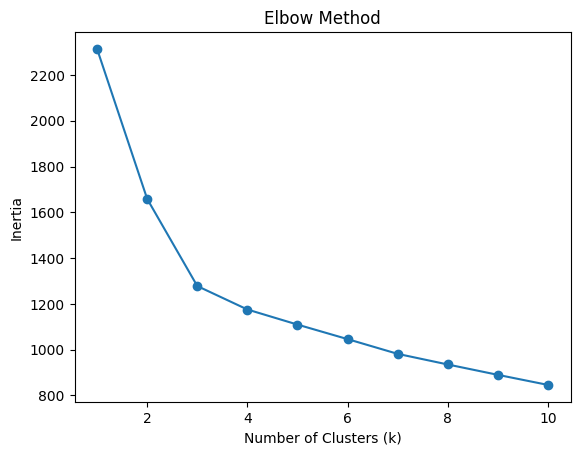

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [4]:
M =20
tau0 = 0.001
tmax = 20
alpha = 1.0
beta = 0.8
rho = 0.3
S = 2 * df.shape[0]

best_partition = ant_based_clustering(df.values, M, tau0, tmax, alpha, beta, rho, S,3)
labels=best_partition
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Score: 0.571138193786884
Davies-Bouldin Index: 0.5342431775436286
Calinski-Harabasz Index: 561.815657860671


In [5]:
from aco import ant_based_clustering
import pandas as pd
df=pd.read_csv(r'C:\Users\KARAN\Desktop\BBS Sir Proj\breast-cancer-clustering.csv',encoding='unicode_escape')
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


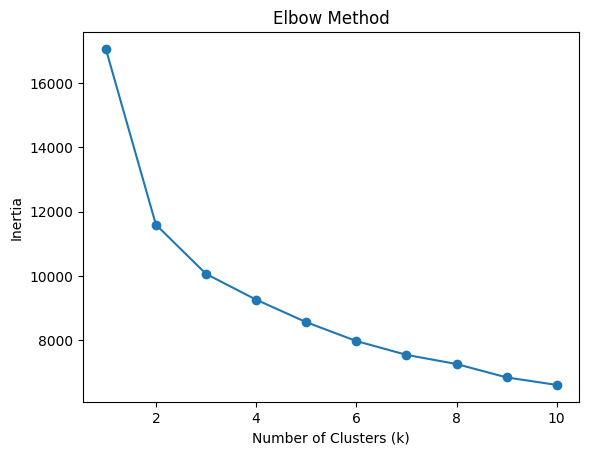

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [7]:
M =20
tau0 = 0.001
tmax = 20
alpha = 1.0
beta = 0.8
rho = 0.3
S = 2 * df.shape[0]

best_partition = ant_based_clustering(df.values, M, tau0, tmax, alpha, beta, rho, S,2)
labels=best_partition

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Score: 0.6972646156059465
Davies-Bouldin Index: 0.5044035685410985
Calinski-Harabasz Index: 1300.2082268895422


In [ ]:
import pandas as pd
df=pd.read_csv(r'C:\Users\KARAN\Desktop\BBS Sir Proj\glass-clustering.csv',encoding='unicode_escape')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


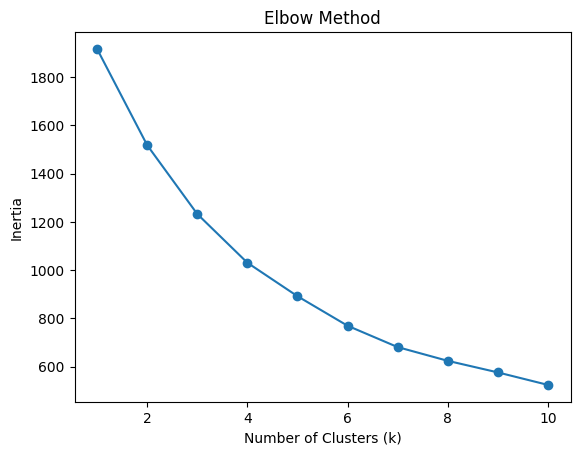

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from aco import ant_based_clustering
M =20
tau0 = 0.001
tmax = 20
alpha = 1.0
beta = 0.8
rho = 0.3
S = 2 * df.shape[0]

best_partition = ant_based_clustering(df.values, M, tau0, tmax, alpha, beta, rho, S,6)
labels=best_partition

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Score: 0.44751878798921824
Davies-Bouldin Index: 0.9707994953097788
Calinski-Harabasz Index: 123.72739459298327


In [ ]:
import pandas as pd
df=pd.read_csv(r'C:\Users\KARAN\Desktop\BBS Sir Proj\haberman-clustering.csv',encoding='unicode_escape')
df

,Age,Op_year,axil_nodes
0,30,62,3
1,30,65,0
2,31,59,2
3,31,65,4
4,33,58,10
...,...,...,...
277,75,62,1
278,76,67,0
279,77,65,3
280,78,65,1


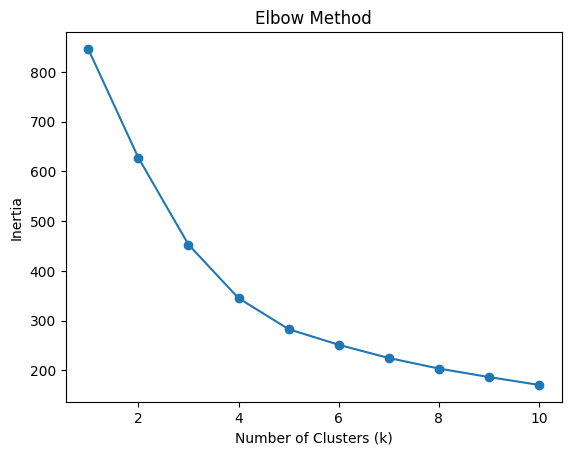

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from aco import ant_based_clustering
M =20
tau0 = 0.001
tmax = 20
alpha = 1.0
beta = 0.8
rho = 0.3
S = 2 * df.shape[0]

best_partition = ant_based_clustering(df.values, M, tau0, tmax, alpha, beta, rho, S,2)
labels=best_partition

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Score: 0.6771917356548319
Davies-Bouldin Index: 0.40897973609859845
Calinski-Harabasz Index: 489.27478776928274


In [ ]:
import pandas as pd
df=pd.read_csv(r'C:\Users\KARAN\Desktop\BBS Sir Proj\iris-clustering.csv',encoding='unicode_escape')
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
142,6.7,3.0,5.2,2.3
143,6.3,2.5,5.0,1.9
144,6.5,3.0,5.2,2.0
145,6.2,3.4,5.4,2.3


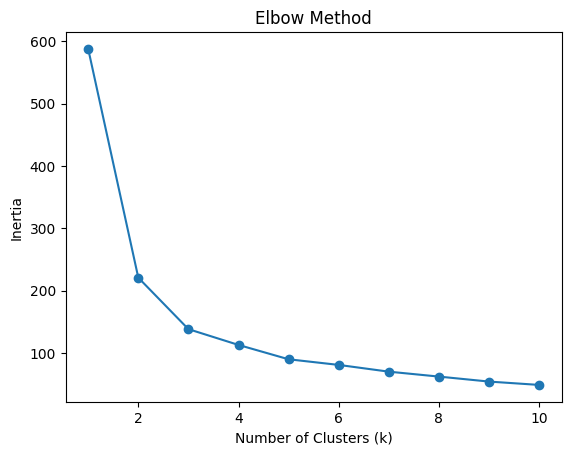

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X=df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from aco import ant_based_clustering
M =20
tau0 = 0.001
tmax = 20
alpha = 1.0
beta = 0.8
rho = 0.3
S = 2 * df.shape[0]

best_partition = ant_based_clustering(df.values, M, tau0, tmax, alpha, beta, rho, S,3)
labels=best_partition

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", db_index)
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Score: 0.5493074238267263
Davies-Bouldin Index: 0.6630766204621272
Calinski-Harabasz Index: 541.4456169295247
